In [69]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [111]:
new_df = pd.read_csv('DailyDelhiClimateTrain.csv', header =0, index_col =0, parse_dates=True)

In [112]:
new_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [113]:
newdf = new_df[['wind_speed']]

In [114]:
newdf

,wind_speed
date,
2013-01-01,0.000000
2013-01-02,2.980000
2013-01-03,4.633333
2013-01-04,1.233333
2013-01-05,3.700000
...,...
2016-12-28,3.547826
2016-12-29,6.000000
2016-12-30,6.266667


In [115]:
#split datset 
X = newdf.values
new_train, new_test = X[1:len(X)-7],X[len(X)-7:]

In [116]:
#train AR
ARmodel = AutoReg(new_train, lags = 29)
ARmodel_fit = ARmodel.fit()
print('Coefficients: %s' % ARmodel_fit.params)

Coefficients: [ 1.37267297e+00  3.77525249e-01 -1.45760910e-02  3.56015181e-02
  1.90457008e-02  2.61385622e-02  1.82034479e-02  4.39807967e-02
 -3.65716619e-03 -2.75308767e-02  2.87593576e-02  2.55518050e-02
  4.66987943e-02 -1.07295763e-02  9.61156227e-03 -3.89611459e-02
  4.57207903e-02 -4.22067963e-02  3.75576671e-02  2.85080083e-02
  7.62272451e-02 -1.58633237e-02  3.46069868e-02  1.45887571e-02
  2.43530209e-02  8.26030540e-02 -5.83041380e-02 -6.23557583e-04
  2.51729842e-02  1.30067093e-02]


In [118]:
#make prediction
new_predictions = ARmodel_fit.predict(start=len(new_train), end=len(new_train)+len(new_test)-1, dynamic=False)
for i in range(len(new_predictions)):
    print('predicted=%f, expected=%f' % (new_predictions[i], new_test[i]))
rmse = sqrt(mean_squared_error(new_test, new_predictions))
print('Test  RMSE: %.3f' % rmse)

predicted=7.647584, expected=8.784211
predicted=6.826986, expected=8.335000
predicted=6.215754, expected=3.547826
predicted=5.360236, expected=6.000000
predicted=5.365521, expected=6.266667
predicted=6.217120, expected=7.325000
predicted=6.451240, expected=0.000000
Test  RMSE: 2.797


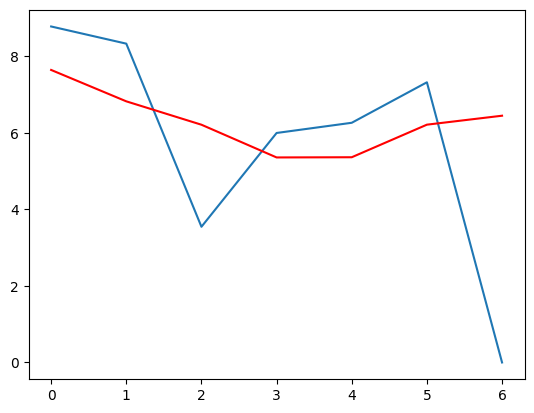

In [119]:
pyplot.plot(new_test)
pyplot.plot(new_predictions, color='red')

In [120]:
#with validation in python
lag_window = 29
AR_model = AutoReg(new_train, lags = 29)
ARmodel_fit = ARmodel.fit()
coef = ARmodel_fit.params

In [121]:
#walk forward ovr time steps in test
history = new_train[len(new_train)- lag_window:]
history = [history[i] for i in range(len(history))]
new_predictions = list()


In [123]:
#So here it is just used for the lag_window, then you finally get the observation values which are 
#then appended to your new predictions and that is what is printed over here in the print command

for t in range(len(new_test)):
    length = len(history)
    lag = [history[i] for i in range(length-lag_window, length)]
    yhat = coef[0]
    for d in range(lag_window):
        yhat += coef[d+1]* lag[lag_window-d-1]
    obs = new_test[t]
    new_predictions.append(yhat)
    history.append(obs)
    print('predicted=%f', 'expected=%f' % (yhat,obs))

TypeError: not all arguments converted during string formatting

In [64]:
rmse = sqrt(mean_squared_error(new_test, new_predictions))
print('Test RMS: %.3f' % rmse)

ValueError: Found input variables with inconsistent numbers of samples: [7, 0]

AttributeError: 'function' object has no attribute 'show'

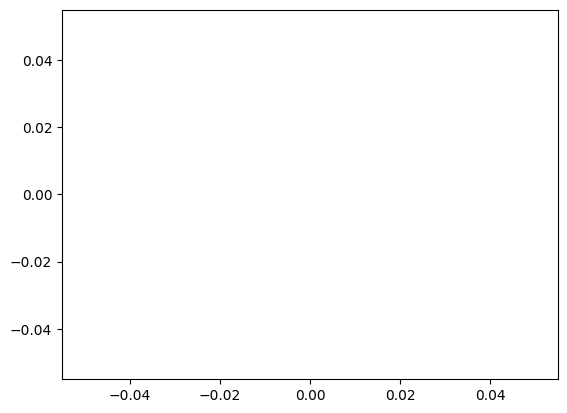

In [65]:
#plot
pyplot.plot(new_test)
pyplot.plot(new_predictions, color='red')
pyplot.plot.show()

FOR MA 
MA model in Python. First you have to use a model to create a forecasted value. Then you create residual values on those forecasted. Use the nave to create a forecasted values there and then take a look at the difference of our nave focus and the actual values to create the residual values. We can use the AR model to train our model on the residual values and to predict the values which are the forecasted values. Again, you will use the future forecasted values of our residuals and add it to our nave focus and you'll get the final forecast value from the MA model. Just try to run the same code on residuals instead of the actual values, and then you can use those residual values to predict the final value residual

In [124]:
df2 = pd.read_csv('DailyDelhiClimateTrain.csv', header = 0, parse_dates=[0])

In [125]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [126]:
df2['t']=df2['wind_speed'].shift(1)

In [127]:
df2['Resid'] = df2['wind_speed'] - df2['t']

In [128]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure,t,Resid
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,0.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2.980000,1.653333
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,4.633333,-3.400000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.233333,2.466667


In [129]:
df2.drop(['humidity', 'meantemp','meanpressure'],axis=1)

,date,wind_speed,t,Resid
0,2013-01-01,0.000000,NaN,NaN
1,2013-01-02,2.980000,0.000000,2.980000
2,2013-01-03,4.633333,2.980000,1.653333
3,2013-01-04,1.233333,4.633333,-3.400000
4,2013-01-05,3.700000,1.233333,2.466667
...,...,...,...,...
1457,2016-12-28,3.547826,8.335000,-4.787174
1458,2016-12-29,6.000000,3.547826,2.452174
1459,2016-12-30,6.266667,6.000000,0.266667
1460,2016-12-31,7.325000,6.266667,1.058333


In [130]:
df2.shape[0]-7

1455

In [131]:
new_train, new_test = df2.Resid[1:df2.shape[0]-7], df2.Resid[df2.shape[0]-7:]

In [132]:
new_train

1        2.980000
2        1.653333
3       -3.400000
4        2.466667
5       -2.220000
          ...    
1450     3.478095
1451   -13.223810
1452    -4.975952
1453     4.031364
1454     3.848636
Name: Resid, Length: 1454, dtype: float64

In [133]:
new_test

1455   -0.300789
1456   -0.449211
1457   -4.787174
1458    2.452174
1459    0.266667
1460    1.058333
1461   -7.325000
Name: Resid, dtype: float64

In [134]:
#train autoreg
new_model = AutoReg(new_train, lags=29)

In [135]:
model_fit = new_model.fit()

In [136]:
#give coef of all 29 lag values
model_fit.params

const        0.014131
Resid.L1    -0.612361
Resid.L2    -0.620462
Resid.L3    -0.578128
Resid.L4    -0.552970
Resid.L5    -0.520740
Resid.L6    -0.496245
Resid.L7    -0.445979
Resid.L8    -0.443595
Resid.L9    -0.464978
Resid.L10   -0.429531
Resid.L11   -0.396987
Resid.L12   -0.343286
Resid.L13   -0.347442
Resid.L14   -0.331110
Resid.L15   -0.363497
Resid.L16   -0.310971
Resid.L17   -0.346868
Resid.L18   -0.302384
Resid.L19   -0.266806
Resid.L20   -0.183476
Resid.L21   -0.193041
Resid.L22   -0.151956
Resid.L23   -0.131042
Resid.L24   -0.100192
Resid.L25   -0.011220
Resid.L26   -0.063782
Resid.L27   -0.057878
Resid.L28   -0.026011
Resid.L29   -0.004746
dtype: float64

In [139]:
new_pred_resid = model_fit.predict(start=len(new_train), end=len(new_train)+len(new_test)).dropna()

In [140]:
new_pred_resid

1455   -0.907382
1456   -0.692063
1457   -0.891721
1458    0.011139
1459    0.869586
1460    0.259276
1461    0.304223
dtype: float64

In [141]:
#add prediction value to t 

new_predictions=df2.t[df2.shape[0]-7:] + new_pred_resid
new_predictions

1455    8.177618
1456    8.092147
1457    7.443279
1458    3.558965
1459    6.869586
1460    6.525942
1461    7.629223
dtype: float64

In [142]:
rmse = sqrt(mean_squared_error(new_test, new_predictions))
print('Test RMS: %.f' % rmse)

Test RMS: 9


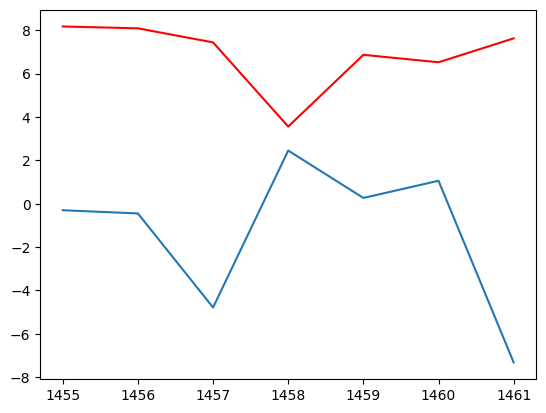

In [143]:
pyplot.plot(new_test)
pyplot.plot(new_predictions, color = 'red')

ARIMA MODEL

In [145]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [146]:
arimadf = pd.read_csv('DailyDelhiClimateTrain.csv',header=0, parse_dates=[0])

In [152]:
arimadf = arimadf.drop(['meantemp', 'humidity', 'meanpressure'], axis=1)

In [153]:
arimadf.head()

,date,wind_speed
0,2013-01-01,0.000000
1,2013-01-02,2.980000
2,2013-01-03,4.633333
3,2013-01-04,1.233333
4,2013-01-05,3.700000


<Axes: >

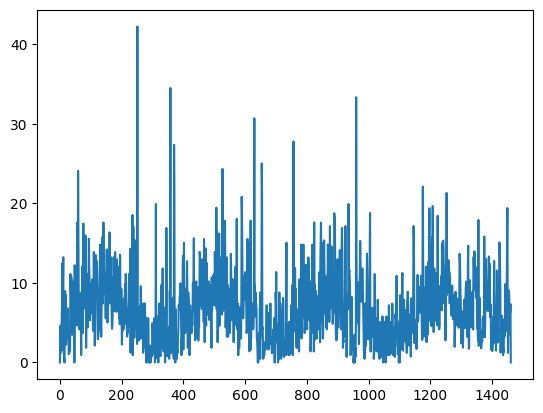

In [154]:
arimadf['wind_speed'].plot()

hould also look at the value after which the line is crossing the confidence interval. You can see it over here, this line is crossing the confidence interval. Just the value above five, I can say it is crossing the confidence interval. We can consider 700 as the value for Q in our case. For any time series, if you want to run ARIMA model, first plot the line chart, identify the trend, and then plot the autocorrelation plot and have a look at where the autocorrelation plot is crossing the confidence interval line

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

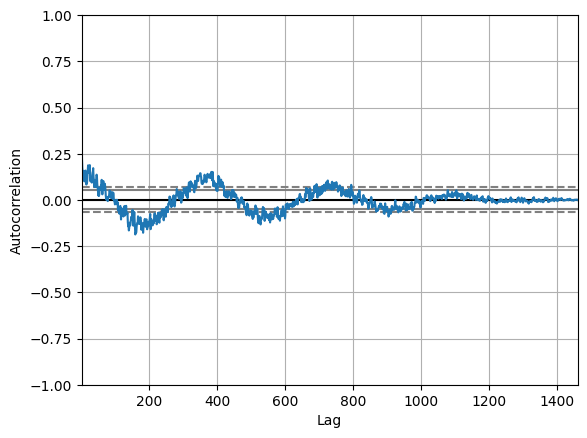

In [155]:
autocorrelation_plot(arimadf['wind_speed'])

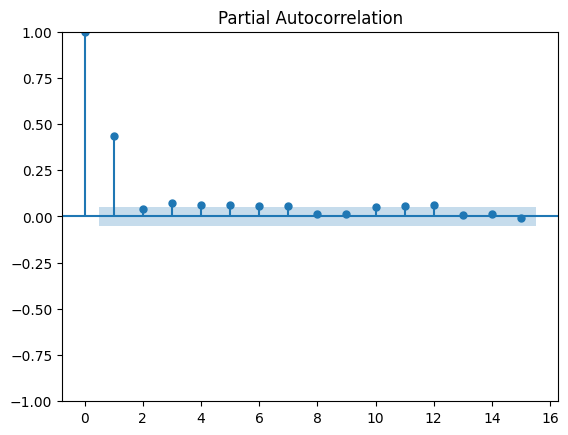

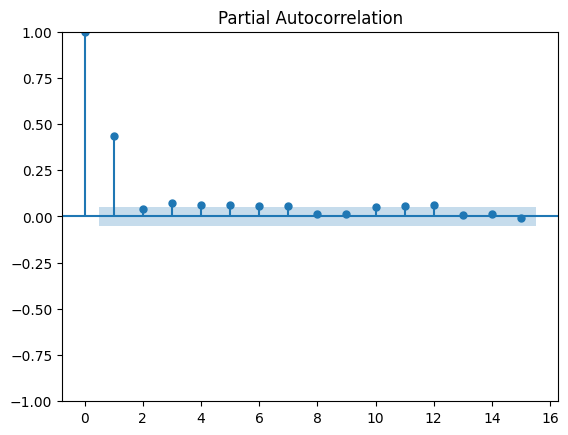

In [156]:
plot_pacf(arimadf['wind_speed'], lags=15)

In [166]:
#q=5, d=2, 
arimamodel = ARIMA(arimadf['wind_speed'], order=(2,2,5))

In [167]:
arimamodel_fit = arimamodel.fit()

C:\Users\1610tx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\1610tx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [169]:
arimamodel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             wind_speed   No. Observations:                 1462
Model:                 ARIMA(2, 2, 5)   Log Likelihood               -4117.195
Date:                Mon, 25 Dec 2023   AIC                           8250.389
Time:                        11:13:08   BIC                           8292.679
Sample:                             0   HQIC                          8266.165
                               - 1462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7302      0.013   -130.536      0.000      -1.756      -1.704
ar.L2         -0.9877      0.013    -74.962      0.000      -1.013      -0.962
ma.L1          0.1035      0.022      4.613      0.000       0.060       0.148
ma.L2         -1.5010      0.014   -105.356      0.000      -1.529      -1.473
ma.L3         -0.7474      0.030    -25.178      0.000      -0.806      -0.689
ma.L4          0.8485      0.012     68.687      0.000       0.824       0.873
ma.L5          0.2968      0.018     16.070      0.000       0.261       0.333
sigma2        16.2570      0.335     48.463      0.000      15.600      16.914
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):              6702.75
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

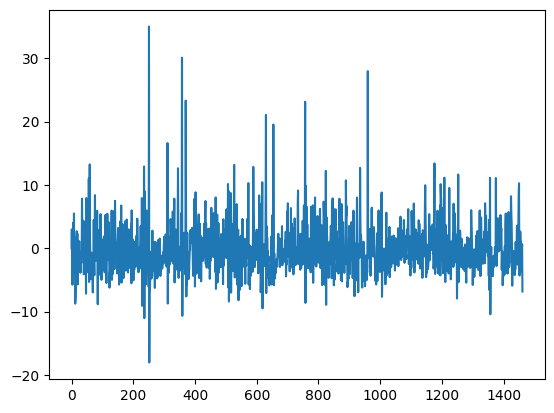

In [170]:
residuals = arimamodel_fit.resid
residuals.plot()

In [171]:
residuals.describe()

count    1462.000000
mean       -0.106434
std         4.054244
min       -18.054709
25%        -2.675022
50%        -0.566119
75%         1.710171
max        35.036568
dtype: float64

In [172]:
output=model_fit.forecast()
output

1454   -1.531721
dtype: float64

In [173]:
arimamodel_fit.forecast(10)

1462    4.189048
1463    6.279705
1464    6.172100
1465    6.323127
1466    6.165874
1467    6.286559
1468    6.230838
1469    6.205822
1470    6.301910
1471    6.158141
Name: predicted_mean, dtype: float64

In [178]:
from pandas import to_datetime

ARIMA modl using a walk-forward validation

In [181]:
#load dataset 
def parser(x):
    return pd.to_datetime.strptime('190' +x, '%Y-%m')
series = pd.read_csv('DailyDelhiClimateTrain.csv', header=0,  index_col =0, parse_dates=True, date_parser=parser)
series.index=series.index.to_period('M')

C:\Users\1610tx\AppData\Local\Temp\ipykernel_38524\3481139852.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('DailyDelhiClimateTrain.csv', header=0,  index_col =0, parse_dates=True, date_parser=parser)


AttributeError: 'function' object has no attribute 'strptime'

In [182]:
#split data into train adn test
X= series.values
size = int(len(X) *0.66)
train, test = X[0:size], X[size:len(X)]
history =[x for x in train]
predictions = list()


NameError: name 'series' is not defined

In [183]:
#evaluate forecast 
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE %.3f' % rmse)


NameError: name 'test' is not defined

In [184]:
#plot forcas againsta ctual
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


NameError: name 'test' is not defined

SARIMA (p,d,q)(P,D,Q)m
- p: trend autoregression order
- d: trend difference order
- q: trend moving average
seasonal elements : there are four, 
- P: Seasonal autoregres order
- D: seasonal difference order
- Q: seasonal moving average order
- m: the number of time steps for a single seasonal period

SARIMAX 
- exogenuos variable to be predicted. => for predicting a sale of the coming days, apart from using the previous day sales value, we can also use other variables, such as the coming day is a holiday or not, or the coming days are a salary day or not. Whether we're doing any promotion on these days or not, so on

In [185]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [190]:
sdf = pd.read_csv('Time-Series Analysis and Forecasting - AirPassengers.csv', header=0, parse_dates=[0])

In [192]:
sdf.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [193]:
sdf.index =sdf['Month']

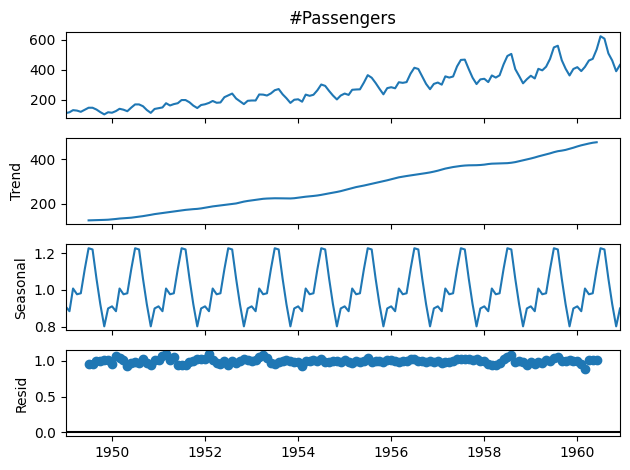

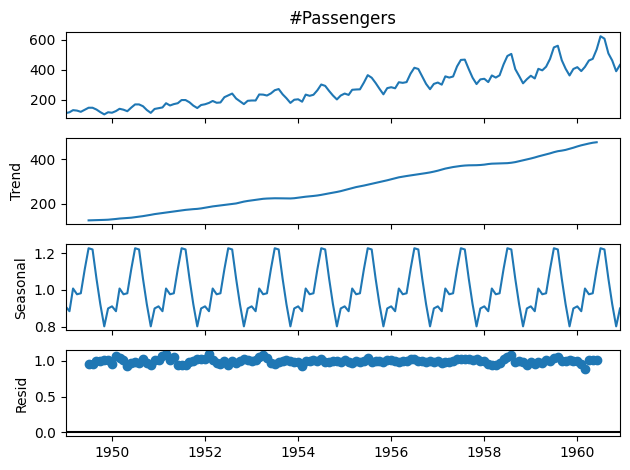

In [194]:
result_a = seasonal_decompose(sdf['#Passengers'],model='multiplicative')
result_a.plot()

In [196]:
# order I have given here is 5, 1, and 3. That parameters basically represents the non seasonal components of 
#my SARIMA including the auto regressive order, differencing and the moving average. Again, I'm giving here my seasonal order, that has to be on 1, 1, 12. That basically represents the seasonal components, including the seasonal autoregressive order, seasonal differencing, 
#and the seasonal moving average, along with a seasonal period of 12. That is the M over here is equal to 12. 
model= SARIMAX(sdf['#Passengers'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\1610tx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [198]:
model_fit =model.fit()

C:\Users\1610tx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\1610tx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


C:\Users\1610tx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [199]:
residuals =model_fit.resid

<Axes: xlabel='Month'>

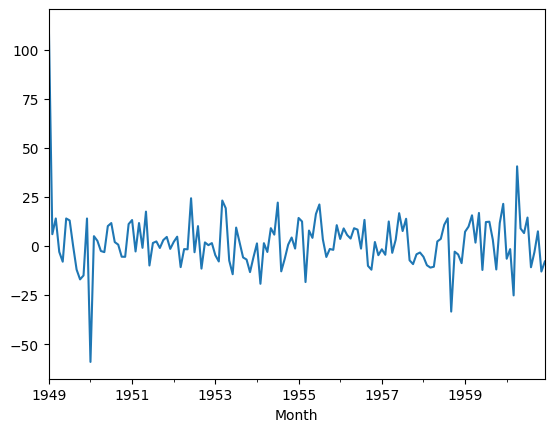

In [200]:
residuals.plot()

In [201]:
output = model_fit.forecast()

In [202]:
output

1961-01-01    448.176223
Freq: MS, dtype: float64

In [203]:
model_fit.forecast(12)

1961-01-01    448.176223
1961-02-01    416.166921
1961-03-01    460.248522
1961-04-01    496.132708
1961-05-01    502.187657
1961-06-01    568.428992
1961-07-01    654.975269
1961-08-01    635.663595
1961-09-01    547.326582
1961-10-01    496.429775
1961-11-01    423.649377
1961-12-01    473.463048
Freq: MS, Name: predicted_mean, dtype: float64

In [204]:
yhat = model_fit.predict()

In [205]:
yhat.head()

1949-01-01      0.000000
1949-02-01    111.997188
1949-03-01    118.000438
1949-04-01    131.999416
1949-05-01    128.999005
Freq: MS, Name: predicted_mean, dtype: float64

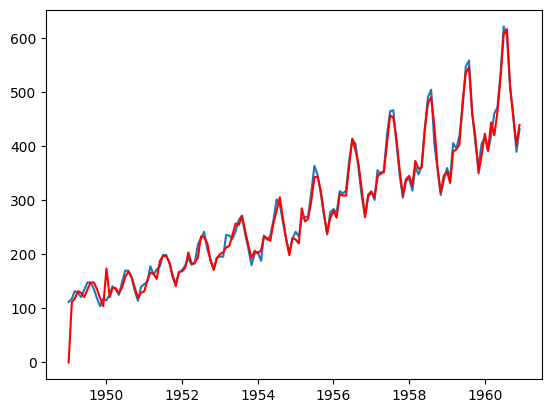

In [206]:
pyplot.plot(sdf['#Passengers'])
pyplot.plot(yhat, color='red')